# 31. Building Neural Network for Regression Problem

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics:

#### Number of Instances:

20640

#### number of Atributes:

8 numeric, predictive attributes and the target

#### Atribute Information

+ __MedInc__: median income in block
+ __HouseAge__: median house age in block
+ __AveRooms__: average number of rooms
+ __AveBedrms__: average number of bedrooms
+ __Population__: block pupulation
+ __AveOccup__: average house occupancy
+ __Latitude__: house block latitude
+ __Longitude__: house block longitude

#### Target

The median house value in units of 100,000 for California districts

#### Documentation


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


In [5]:
# Show classes
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Train Test Split - Documentation

Split arrays or matrices into random train and test subsets.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
from sklearn.model_selection import train_test_split

#train_test_split(DatosEntrada, SalidaEsperada, semilla)

# Separa los datos en conjunto(set) de entramiento y de comprobacion(test)
# tanto para entrada como salida esperada
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# Separa los datos del conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validacion
# tanto para entrada como para salida esperada
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

#### Standar Scaler - Documentation

Standardize features by removing the mean and scaling to unit variance.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [7]:
from sklearn.preprocessing import StandardScaler

# We want all the variables with mean zero and their variance as one
scaler = StandardScaler() # obj

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
# Establecemos las semillas para poder reproducir otras veces los resultados
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

#### Structure of our NN

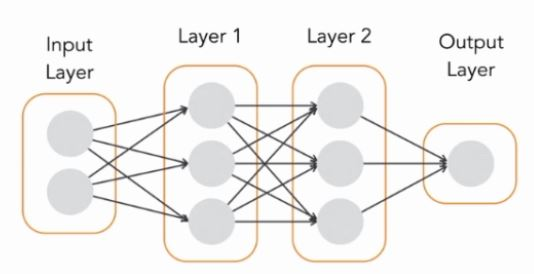

In [10]:
from IPython.display import Image
Image("../S10 - Python - Building and Trainning the Model/images/sequential_api.jpg", height=400, width=400)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), # tenemos 8 atributos iniciales
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

# Otra forma de poner la primera capa, la de los atributos (clases)
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


#### Compilar modelo - Documentacion

https://keras.io/api/models/model_training_apis/

In [13]:
model.compile(loss="mean_squared_error",             # Por usar Regresion
             optimizer=keras.optimizers.SGD(lr=1e-3),# Stocastic Gradient Descent, learning rate
             metrics=['mae'])                        # mean absolute error

In [14]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - ETA: 0s - loss: 1.9263 - mae: 1.020 - 1s 69us/sample - loss: 1.8631 - mae: 1.0009 - val_loss: 3.2403 - val_mae: 0.6867
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6723 - mae: 0.6092 - val_loss: 0.6939 - val_mae: 0.5660
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5927 - mae: 0.5608 - val_loss: 0.5531 - val_mae: 0.5386
Epoch 4/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5550 - mae: 0.5401 - val_loss: 0.5519 - val_mae: 0.5200
Epoch 5/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5278 - mae: 0.5238 - val_loss: 0.5715 - val_mae: 0.5111
Epoch 6/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5032 - mae: 0.5098 - val_loss: 0.5591 - val_mae: 0.4969
Epoch 7/20
11610/11610 [==============================] - 0s 28us/sample - loss

In [15]:
mae_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
model_history.history

{'loss': [1.8630863191288776,
  0.6723268832039155,
  0.5927273134133818,
  0.5549557611153724,
  0.5278301263861775,
  0.5032001591981433,
  0.48625867835002967,
  0.47013836985102614,
  0.4585774309670073,
  0.44755741841417257,
  0.43912484500040583,
  0.431604173376476,
  0.42550204823902205,
  0.4202936603220037,
  0.41540779366665725,
  0.41102040187743694,
  0.4076157877354864,
  0.40358214730029474,
  0.4007209645377265,
  0.39763178234465874],
 'mae': [1.000874,
  0.60915804,
  0.56077474,
  0.5401411,
  0.5238083,
  0.5097514,
  0.5025851,
  0.49197477,
  0.48624775,
  0.4792753,
  0.47449708,
  0.47036856,
  0.4668606,
  0.4640983,
  0.46149576,
  0.45862278,
  0.45648307,
  0.45378846,
  0.4530758,
  0.45097804],
 'val_loss': [3.2403190678712317,
  0.6938523369550089,
  0.5531256486741147,
  0.5519348537506059,
  0.5714834211023587,
  0.5590506266099846,
  0.4592994913266303,
  0.4650563666524813,
  0.43920233128760827,
  0.425675519384463,
  0.4121819322346409,
  0.4051738

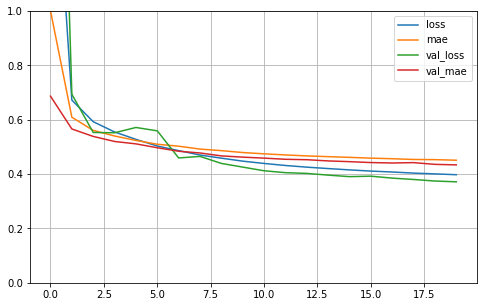

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [18]:
# Crear nuevos datos (como si lo fueran)
X_new = X_test[:3]

In [19]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5269089]
 [1.885108 ]
 [3.3870173]]
[0.477   0.458   5.00001]


# 32. Using Functional API for Complex Architectures


## Functional API

Not all Neural Network models are simply sequential. 

- Some may have complex topologies.

- Some may have multiple inputs and/or multiple outputs.

For example, a __Wide and Deep Neural Network__ connects all or part of the inputs directly to de outpu layer.

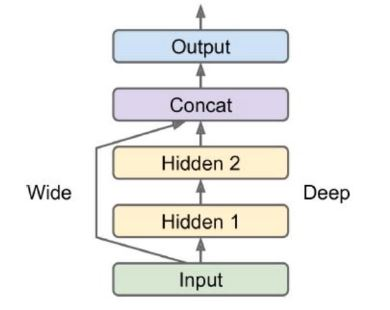

In [21]:
Image("./images/img1.jpg", height=300, width=300)

In [24]:
# Creando las capas de la red neuronal
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) #llamada como funcion. Estas conectandolas.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

# Creando el modelo, indicas que quieres como entrada y salida
model = keras.models.Model(inputs=[input_], outputs=[output])

In [25]:
# Mostrar el resumen de la red
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_10[0][0]               

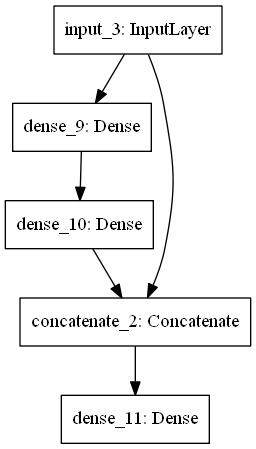

In [26]:
import pydot
from tensorflow.keras.utils import plot_model

# Visualizar la estructura de la NN
keras.utils.plot_model(model)

In [27]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

#mae = mean absolute error
#SGD = Stocastic Gradient Descent
#lr = learning rate

In [28]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/40
11610/11610 [==============================] - 1s 56us/sample - loss: 1.4768 - mae: 0.8896 - val_loss: 1.1430 - val_mae: 0.6737
Epoch 2/40
11610/11610 [==============================] - 0s 28us/sample - loss: 0.7901 - mae: 0.6511 - val_loss: 1.8823 - val_mae: 0.6522
Epoch 3/40
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7134 - mae: 0.6151 - val_loss: 1.4391 - val_mae: 0.6103
Epoch 4/40
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6779 - mae: 0.5981 - val_loss: 0.6359 - val_mae: 0.5719
Epoch 5/40
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6301 - mae: 0.5753 - val_loss: 1.0426 - val_mae: 0.5776
Epoch 6/40
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5963 - mae: 0.5580 - val_loss: 0.9066 - val_mae: 0.5491
Epoch 7/40
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5795 - mae: 0.5507 - val_loss: 0.6

In [29]:
mae_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [30]:
model_history.history

{'loss': [1.47678690928,
  0.7901139536774641,
  0.7134071622605369,
  0.6778567348083065,
  0.6300701174419774,
  0.5962552384864042,
  0.5794635586857693,
  0.5485908071200053,
  0.53553974208495,
  0.5140700692764959,
  0.5007966494683456,
  0.4873596482293345,
  0.47598223968583075,
  0.46607111498366954,
  0.45773030209910964,
  0.44948626743319936,
  0.4426662998015669,
  0.4359701445552422,
  0.43162009788422007,
  0.4261493065663189,
  0.4223906128700184,
  0.4181851811341229,
  0.4144102628430244,
  0.4111529581614551,
  0.4078398566016034,
  0.4050017837252112,
  0.4027435965213562,
  0.3998980931790095,
  0.3977996229714715,
  0.3954947617164878,
  0.39353321894913473,
  0.39119454514713353,
  0.38960485775136006,
  0.38763262894931894,
  0.386215055861625,
  0.38408873388728226,
  0.38201946848225327,
  0.38234498389931615,
  0.37940846409497847,
  0.3783282462221913],
 'mae': [0.8896311,
  0.6510807,
  0.61506003,
  0.59810376,
  0.57531244,
  0.5580491,
  0.55070674,
  0.

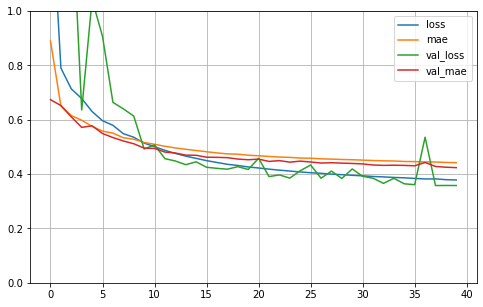

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()